In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 4)
plt.style.use('fivethirtyeight')

In [2]:
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller

In [3]:
### Carregando dados 

### Escolha uma subestação

In [4]:
# LISTA DE SUBESTAÇÔES

# 'Agua_Grande', 'Aldeia_Campista', 'Alvorada', 'Areia_Branca', 'Ari_Franco,Baependi', 'Barra, Barra_II',
# 'Boca_do_Mato', 'Botafogo', 'Bras_de_Pina', 'Brisamar', 'Cachambi', 'Cachamorra', 'Camara', 'Camerino',
#'Campo_Marte', 'Carmari', 'Cascadura', 'Caxias', 'Centenario', 'Coelho_da_Rocha', 'Colegio', 'Comendador_Soares',
#'Copacabana', 'Cosmos', 'Curicica', 'Democraticos', 'Eldorado', 'Esperanca', 'Fontinele', 'Frei_Caneca', 'Fundao', 
#'Gardenia', 'Governador', 'Guadalupe', 'Guanabara', 'Humaita', 'Influencia', 'Inmetro', 'Itaguai', 'Itapeba',
#'Jaboatao', 'Jardim_Botanico', 'Leblon', 'Leme', 'Leopoldo', 'Mackenzie', 'Marapicu', 'Mato_Alto', 'Maturaca',
#'Mena_Barreto', 'Meriti', 'Nova_Iguacu', 'Paciencia', 'Padre_Miguel', 'Pavuna', 'Pedro_Ernesto', 'Piedade',
#'Porta_Dagua', 'Posto_Seis', 'Queimados', 'Ramos', 'Recreio', 'Retiro', 'Rio_Comprido', 'Rocha_Freire', 'Rosali',
#'Samaritano', 'Santa_Cecilia', 'Santa_Clara', 'Santa_Luzia', 'Santissimo', 'Santo_Antonio', 'Sao_Conrado', 'Sao_Joao', 'Sapucaia', 'Sarapui', 'Saudade', 'Seropedica', 'Taquara', 'Terra_Nova', 'Tres_Rios', 'Triagem', 'Trovao',
#'Turiacu', 'Uruguai', 'Vigario', 'Vigario_Geral', 'Vila_Valqueire', 'Vilar_dos_Teles',
# 'Volta_Redonda', 'Washington_Luis', 'Zona_Industrial'

In [5]:
subestacao = 'Aldeia_Campista' 

In [6]:
df = pd.read_excel('carga_2010_2021.xlsx')
series = TimeSeries.from_dataframe(df, 'data', subestacao)

#### Carga média e desvio padrão das cargas

In [7]:
carga_media=df[subestacao].mean()
carga_dp=df[subestacao].std()
print(carga_media)
print(carga_dp)

25332.478785289855
4332.404435259736


### Separando treinamento e validação

In [8]:
train, val = series.split_after(pd.Timestamp('20200101'))

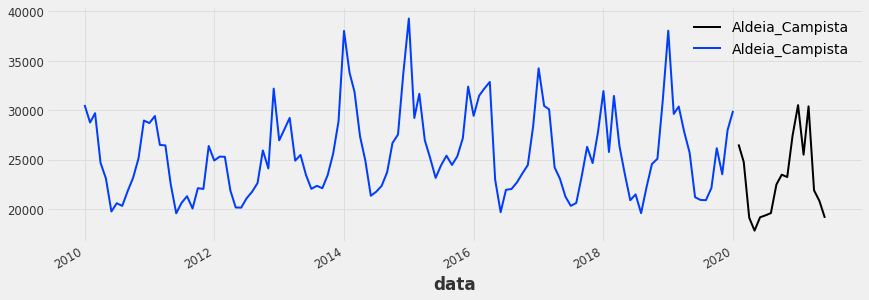

In [9]:
val.plot()
train.plot()

In [10]:
type(train)

darts.timeseries.TimeSeries

### Exponetial Smoothing

#### Aplicaçãod o modelo ExponentialSmoothing 

In [11]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))
#prediction = model.predict(36)

Importing plotly failed. Interactive plots will not work.
/home/pi/anaconda3/envs/darts38/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


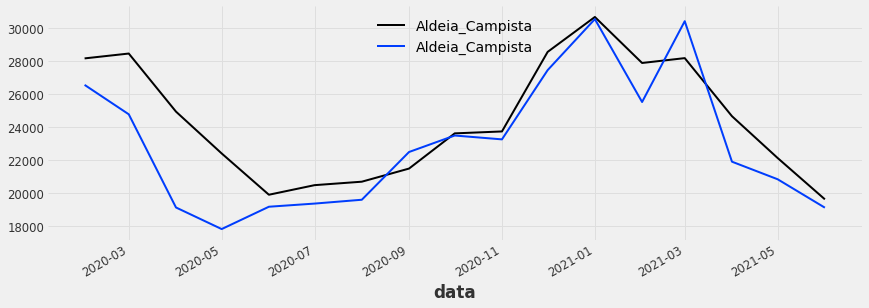

In [12]:
prediction.plot()
val.plot()

In [13]:
type(prediction)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

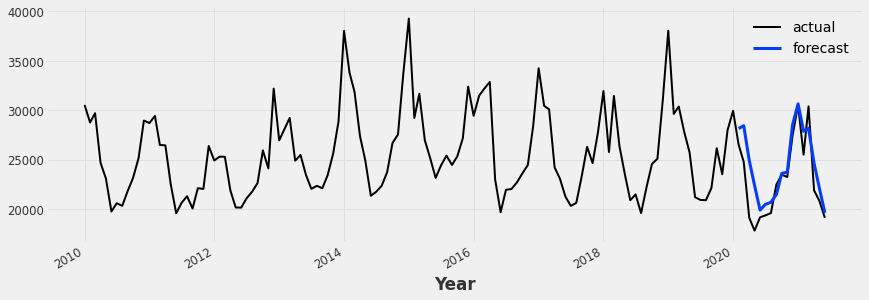

In [14]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [15]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionModel,
    Theta,
    FFT
)
from darts.metrics import mape, mase
# from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.statistics import check_seasonality, plot_acf

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

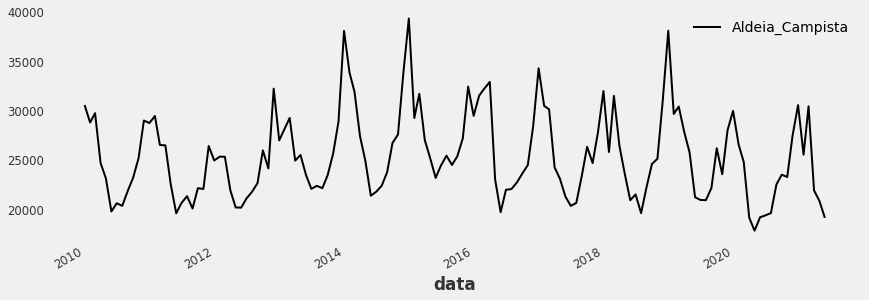

In [16]:
fig, ax = plt.subplots()
series.plot(ax=ax)
ax.grid()

## train & validation

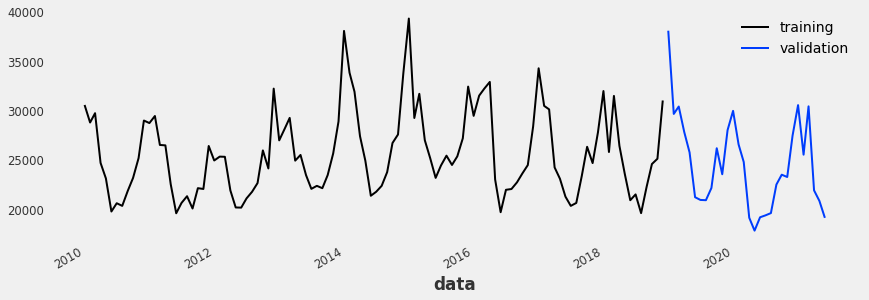

In [17]:
train, val = series.split_before(pd.Timestamp('20190101'))

fig, ax = plt.subplots()
train.plot(label='training', ax=ax)
val.plot(label='validation', ax=ax)
ax.legend(loc='best')
ax.grid()

## Toy model
## NaiveSeasonal(K=1)

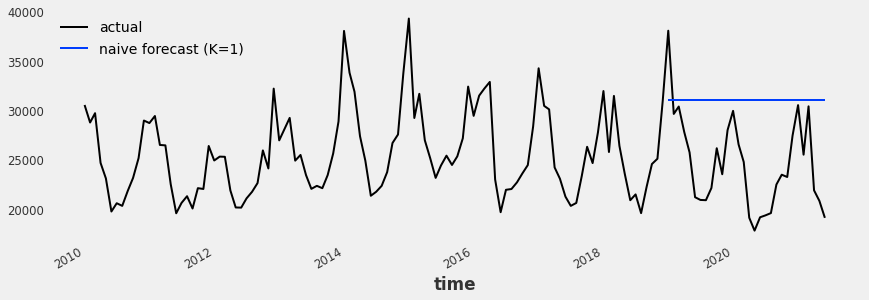

In [18]:
naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

fig, ax = plt.subplots()
series.plot(label='actual', ax=ax)
naive_forecast.plot(label='naive forecast (K=1)', ax=ax)
ax.legend(loc='best')
ax.grid()

In [19]:
#help(NaiveSeasonal)

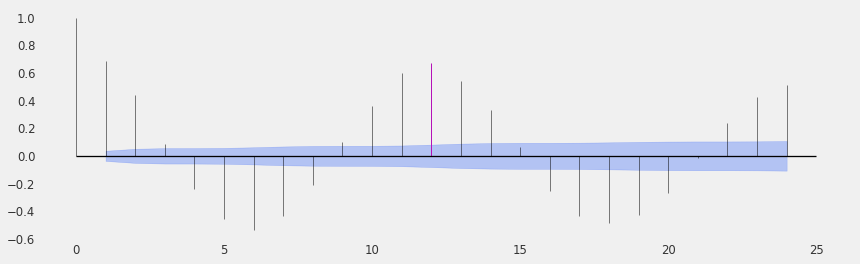

In [20]:
fig, ax = plt.subplots()
plot_acf(train, m=12, alpha=.05, axis=ax)
ax.grid()

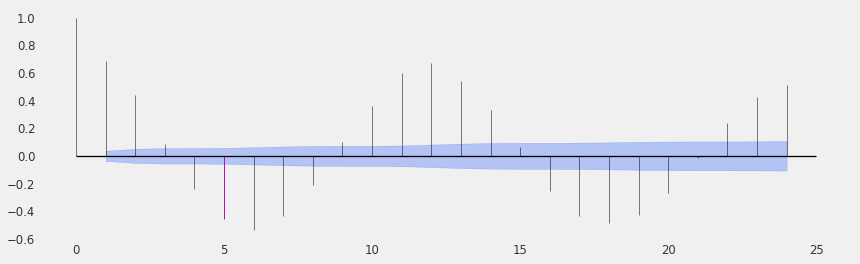

In [21]:
fig, ax = plt.subplots()
plot_acf(train, m=5, alpha=.05, axis=ax)
ax.grid()

## NaiveSeasonal(K=12)

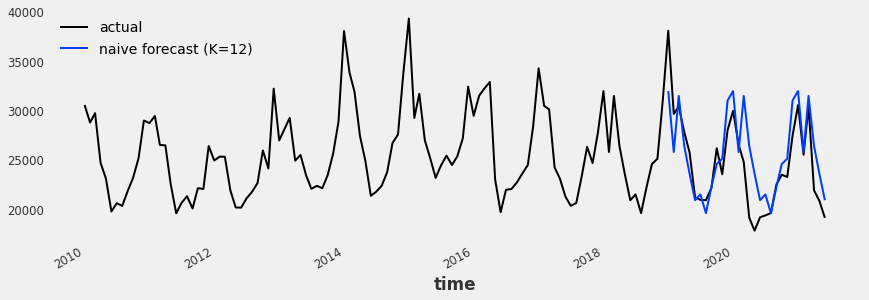

In [22]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))

fig, ax = plt.subplots()
series.plot(label='actual')
seasonal_forecast.plot(label='naive forecast (K=12)')
ax.grid()
ax.legend(loc='best')

In [23]:
print("Mean absolute percentage error for seasonal forecast: {:.2f}%.".format(mape(series, seasonal_forecast)))

Mean absolute percentage error for seasonal forecast: 9.54%.


## NaiveDrift()

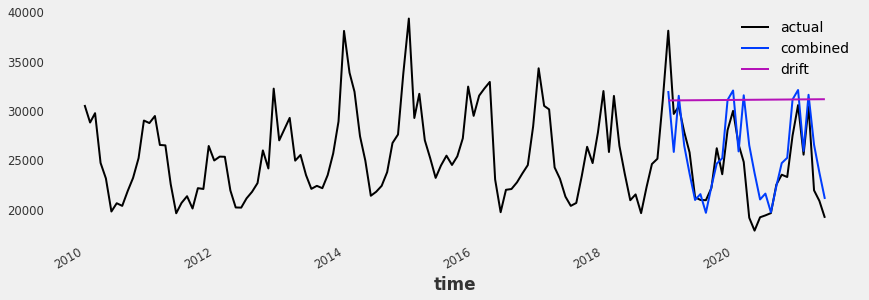

In [24]:
drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(30)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

fig, ax = plt.subplots()
series.plot(label='actual')
combined_forecast.plot(label='combined')
drift_forecast.plot(label='drift')
ax.grid()
ax.legend(loc='best')

In [25]:
print("Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(mape(series, combined_forecast)))

Mean absolute percentage error for the combined naive drift + seasonal: 9.74%.


### Aplicação de 4 modelos
#### ExponentialSmoothing
#### Prophet
#### AutoARIMA
#### Theta

In [26]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

model Exponential smoothing obtains MAPE: 8.78%
model Prophet obtains MAPE: 6.56%
model Auto-ARIMA obtains MAPE: 13.55%
model Theta(2) obtains MAPE: 9.93%


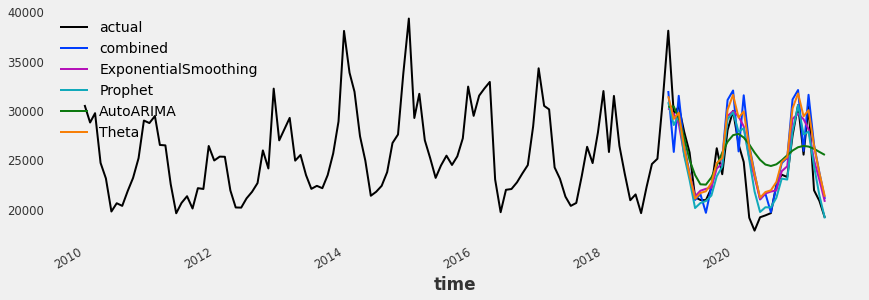

In [27]:
es = ExponentialSmoothing()
es.fit(train)
es_forecast = es.predict(len(val))

prophet = Prophet()
prophet.fit(train)
prophet_forecast = prophet.predict(len(val))

aa = AutoARIMA()
aa.fit(train)
aa_forecast = aa.predict(len(val))

theta = Theta()
theta.fit(train)
theta_forecast = theta.predict(len(val))

fig, ax = plt.subplots()
series.plot(label='actual')
combined_forecast.plot(label='combined')
es_forecast.plot(label='ExponentialSmoothing')
prophet_forecast.plot(label='Prophet')
aa_forecast.plot(label='AutoARIMA')
theta_forecast.plot(label='Theta')
ax.grid()
ax.legend(loc='best')

In [28]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionModel,
    Theta,
    FFT
)
from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.statistics import check_seasonality, plot_acf

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

## Theta method

In [29]:
thetas = 2 - np.linspace(-10, 10, 150)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [30]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f}, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))

The MAPE is: 6.21, with theta = 0.1879194630872476.


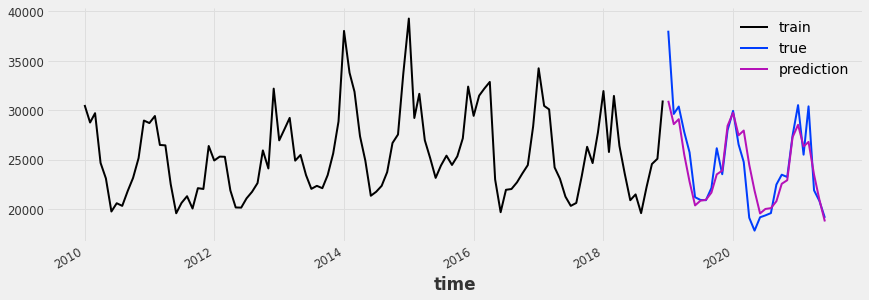

In [31]:
fig, ax = plt.subplots()
train.plot(label='train', ax=ax)
val.plot(label='true', ax=ax)
pred_best_theta.plot(label='prediction', ax=ax)
ax.legend(loc='best')

In [32]:
best_theta

0.1879194630872476

## Backtesting

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 7.183553325773444
Median error (MAPE) over all historical forecasts: 6.567900311775646


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

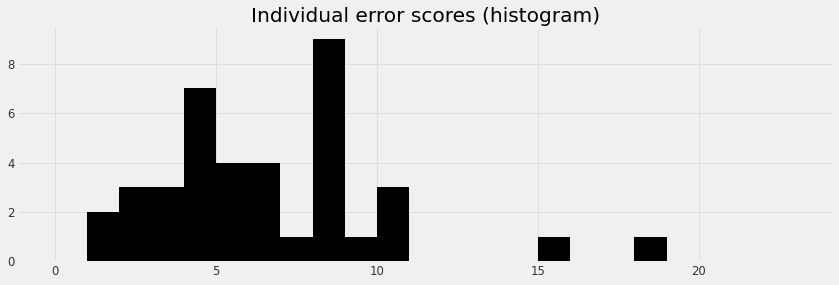

In [33]:
average_error = best_theta_model.backtest(series, start=pd.Timestamp('20180101'), forecast_horizon=3, verbose=True)
median_error = best_theta_model.backtest(series, start=pd.Timestamp('20180101'), forecast_horizon=3, reduction=np.median, verbose=True)
print("Average error (MAPE) over all historical forecasts: {}".format(average_error))
print("Median error (MAPE) over all historical forecasts: {}".format(median_error))

raw_errors = best_theta_model.backtest(series, start=pd.Timestamp('20180101'), forecast_horizon=3, reduction=None, verbose=True)
fig, ax = plt.subplots()
ax.hist(raw_errors, bins=np.arange(0, max(raw_errors), 1))
ax.set_title("Individual error scores (histogram)")

historical_fcast_theta = best_theta_model.historical_forecasts(series, start=pd.Timestamp('20180101'), forecast_horizon=3, verbose=True)

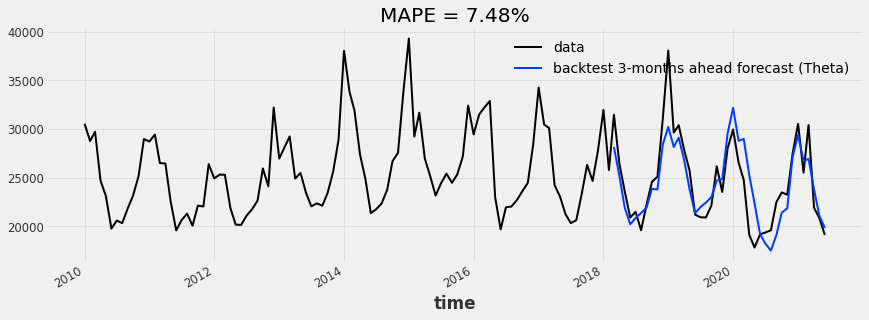

In [34]:
fig, ax = plt.subplots()
series.plot(label='data', ax=ax)
historical_fcast_theta.plot(label='backtest 3-months ahead forecast (Theta)', ax=ax)
ax.set_title('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, series)))
ax.legend(loc='best')

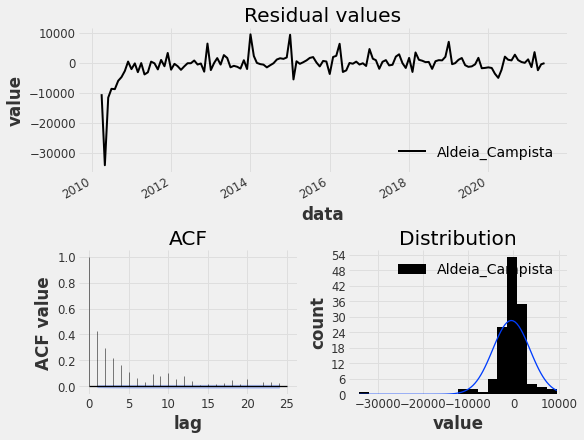

In [35]:
plot_residuals_analysis(best_theta_model.residuals(series))

### ExponentialSmoothing model

  0%|          | 0/52 [00:00<?, ?it/s]

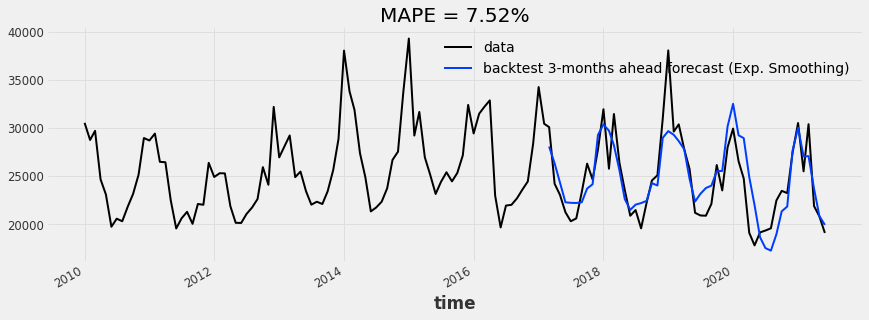

In [36]:
model_es = ExponentialSmoothing()
historical_fcast_es = model_es.historical_forecasts(series, start=pd.Timestamp('20170101'), forecast_horizon=3, verbose=True)

fig, ax = plt.subplots()
series.plot(label='data', ax=ax)
historical_fcast_es.plot(label='backtest 3-months ahead forecast (Exp. Smoothing)', ax=ax)
ax.set_title('MAPE = {:.2f}%'.format(mape(historical_fcast_es, series)))
ax.legend(loc='best')